# Curso de Optimización
## Tarea 8

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Abril 29, 2025**   |
| Fecha límite de entrega de la tarea: | **Mayo  8, 2025**   |


### Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimirlo
  y puede anexar sólo el notebook en la tarea.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea como un archivo independiente.
  **No lo incluya dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

---

## Ejercicio 1. Mínimos cuadrados lineales (2 puntos)

Encontrar los coeficientes $c_0, c_1, ...$ de un polinomio de dos variables
$p_n(x_1, x_2)$ de grado $n$ que resuelve el problema de mínimos
cuadrados lineales:

$$ \min_{c_i} \sum_{i=1}^m [p_n(x_{1i}, x_{2i}) - y_i]^2.  $$

El conjunto de datos $\{ (x_{11}, x_{21}, y_1), (x_{12}, x_{22}, y_2),
..., (x_{1m}, x_{2m}, y_m)\}$ está generado como se muestra en el
siguiente código. Las coordenadas de las variables $x_1$ y $x_2$
están almacenadas como columnas en el arreglo $\mathbf{X}$ y los
valores $y_i$ se almacenan en el arreglo $\mathbf{y}$:

$$ \mathbf{X} = \begin{bmatrix} x_{11} & x_{21} \\
x_{12} & x_{22} \\
\vdots & \vdots \\
x_{1m} & x_{2m}
\end{bmatrix}, \quad
\mathbf{y} = \begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{pmatrix}.
$$


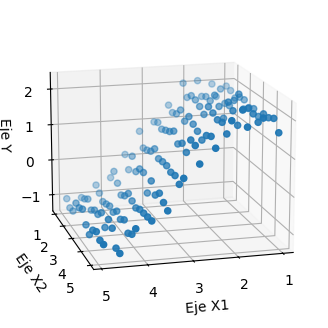

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Generate the true function and the data set
np.random.seed(42)
true_function = lambda x: 1.5*np.sin(x[0]) + 0.5

x1 = np.array([i*np.pi/180 for i in range(60,300,20)])
x2 = np.linspace(1,5,len(x1))
x1_grid,x2_grid = np.meshgrid(x1,x2)
m  = len(x1)*len(x2)
X  = np.zeros((m,2))
X[:,0]  = x1_grid.flatten()
X[:,1]  = x2_grid.flatten()

y = np.zeros(m)
for i,x1x2 in enumerate(X):
    y[i] = true_function(x1x2)
y += np.random.normal(0, 0.15, m)

# Grafica del conjunto de datos
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('Eje X1')
ax.set_ylabel('Eje X2')
ax.set_zlabel('Eje Y')
ax.view_init(15, 75)

El polinomio $p_n(x_1, x_2)$ de grado $n$ es de la forma

$$ p_n(x_1, x_2) = \sum_{i_1 =0}^n
\sum_{i_2=0}^{n-i_1}  c_i x_1^{i_1}x_2^{i_2},$$

es decir, el polinomio está formado por los términos $c_i x_1^{i_1}x_2^{i_2}$,
donde $i$ indexa cada término.

Ejemplos:

$$ p_1(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2$$

$$ p_2(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3x_1x_2 + c_4 x_1^2 +
c_5 x_2^2$$

Entonces

$$  \sum_{i=1}^m [p_n(x_{1i}, x_{2i}) - y_i]^2
=  (\mathbf{X}_n \mathbf{c}-\mathbf{y})^\top (\mathbf{X}_n \mathbf{c}-\mathbf{y})   $$

donde $\mathbf{c}= (c_0, c_1, ..., c_r)^\top$ es el vector de coeficientes
del polinomio, $r+1$ es la cantidad de coeficientes y $\mathbf{X}_n$
es la matriz que tiene en cada columna los valores

$$\begin{array}{c}
x_{11}^{i_1}x_{21}^{i_2} \\  
x_{12}^{i_1}x_{22}^{i_2} \\  
\vdots \\
x_{1m}^{i_1}x_{2m}^{i_2}
\end{array}$$

Para generar generar la matriz $\mathbf{X}_n$  se puede usar la
clase `PolynomialFeatures`. Por ejemplo, crear la matriz $\mathbf{X}_3$
asociada al polinomio de grado 3:   

In [3]:
from sklearn.preprocessing import PolynomialFeatures

n    = 3
poly = PolynomialFeatures(n, include_bias=True)
Xn   = poly.fit_transform(X)
print('Tamaño de la matriz Xn:', Xn.shape)

Tamaño de la matriz Xn: (144, 10)


De acuerdo con la teoría, la solución $\mathbf{c}$ del problema
de mínimos cuadrados se obtiene resolviendo el sistema de ecuaciones

$$ \mathbf{X}_n^\top\mathbf{X}_n\mathbf{c} = \mathbf{X}_n^\top\mathbf{y}$$

Dado el vector $\mathbf{c}$, los valores del polinomio en los
puntos $(x_{1i}, x_{2i})$ están dados por

$$ \mathbf{y}_{pred} = \mathbf{X}_n\mathbf{c},$$

y la raíz del error cuadrático medio entre los valores verdaderos
y los que predice el modelo está dado por

$$
RMSE = \sqrt{\frac{(\mathbf{y}-\mathbf{y}_{pred})^\top(\mathbf{y}-\mathbf{y}_{pred})}{m}}.
$$


1. Escriba una función que reciba como argumentos la matriz  
   $\mathbf{X}$, el vector $\mathbf{y}$ y el grado $n$ del polinomio.
   La función devuelve el vector de coeficientes $\mathbf{c}$
   del polinomio $p_n(x_1,x_2)$ y el número de condición
   de la matriz $\mathbf{X}_n$.
2. Pruebe la función para $n=1,3, 5$ y $7$.
   En cada caso calcule el vector $\mathbf{y}_{pred}$,  el RMSE e imprima
   los valores:
   
- El grado $n$ del polinomio
- El número de condición de la matriz $\mathbf{X}_n$
- El RMSE

Puede usar el siguiente código para graficar la superficie
del polinomio usando los valores que toma en los nodos de la
retícula:

```
Y_grid  = y_pred.reshape( len(x1), len(x2) )
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(15, 75)
```

### Solución:

In [ ]:
def poly_data(X, y, n):
    poly = PolynomialFeatures(n, include_bias=True)
    Xn   = poly.fit_transform(X)
    A = Xn.T @ Xn
    c = np.linalg.solve(A, Xn.T @ y)
    y_pred = Xn @ c
    rmse = np.sqrt(np.linalg.norm(y - y_pred)/len(y))
    return c, Xn, rmse, np.linalg.cond(A)

Grado del polinomio: 1
Número de condición: 2.71e+02
RMSE: 1.9651

Grado del polinomio: 3
Número de condición: 1.17e+07
RMSE: 1.3264

Grado del polinomio: 5
Número de condición: 7.63e+11
RMSE: 1.3383

Grado del polinomio: 7
Número de condición: 7.12e+16
RMSE: 1.2440



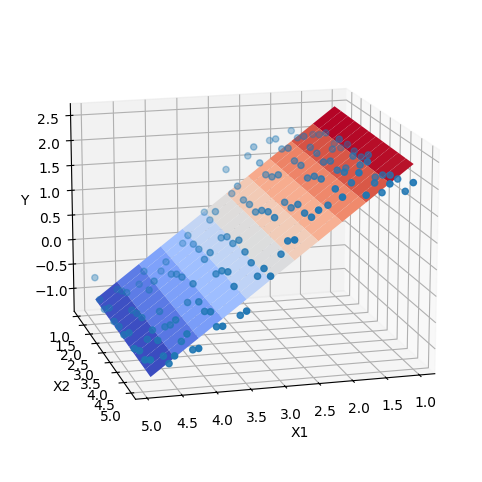

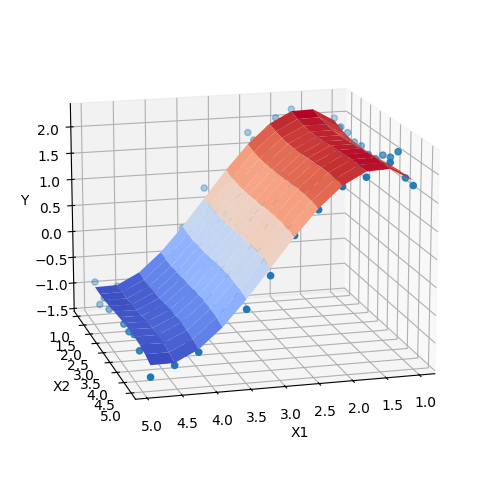

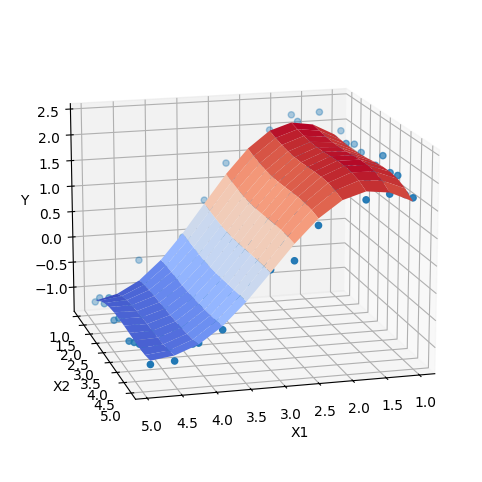

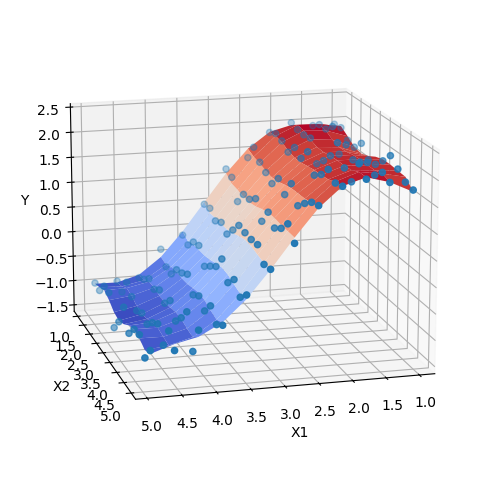

In [9]:
ns = [1, 3, 5, 7]

for n in ns:
    true_function = lambda x: 1.5*np.sin(x[0]) + 0.5

    x1 = np.array([i*np.pi/180 for i in range(60,300,20)])
    x2 = np.linspace(1,5,len(x1))
    x1_grid,x2_grid = np.meshgrid(x1,x2)
    m  = len(x1)*len(x2)
    X  = np.zeros((m,2))
    X[:,0]  = x1_grid.flatten()
    X[:,1]  = x2_grid.flatten()

    y = np.zeros(m)
    for i,x1x2 in enumerate(X):
        y[i] = true_function(x1x2)
    y += np.random.normal(0, 0.15, m)

    c, Xn, rmse, cond = poly_data(X, y, n)
    y_pred = Xn @ c

    print(f"Grado del polinomio: {n}")
    print(f"Número de condición: {cond:.2e}")
    print(f"RMSE: {rmse:.4f}\n")
    
    Y_grid  = y_pred.reshape( len(x1), len(x2) )
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.scatter3D(X[:,0], X[:,1], y)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.view_init(15, 75)

```



```
---

## Ejercicio 2. Mínimos cuadrados no lineales (3 puntos)

Usando los datos del Ejercicio 1, calcular los coeficientes
$\mathbf{c} = (c_0, c_1, c_2,c_3)^\top$ del modelo

$$ f(\mathbf{x}; \mathbf{c}) = f(x_1, x_2; \mathbf{c}) = c_0 + c1\sin(c_2x_1)\cos(c_3x_2) $$

resolviendo el problema de mínimos cuadrados no lineales

$$ \min_{\mathbf{c}} \; \sum_{i=1}^m  r_i(\mathbf{c})^2 $$

donde $r_i(\mathbf{c})= f(x_{1i}, x_{2i}, \mathbf{c}) - y_i$ son las
componentes del vector de residuales

$$ r(\mathbf{c}) = \begin{pmatrix}
r_1(\mathbf{c}) \\
r_2(\mathbf{c}) \\
\vdots \\
r_m(\mathbf{c})
\end{pmatrix}.
$$

1. Escriba el código de la función que evalúa el modelo $f(\mathbf{x}; \mathbf{c})$.
2. Escriba el código de la función que evalúa el residual $r(\mathbf{c})$
   para el conjunto de datos del Ejercicio 1.
3. Escriba el código de la función que calcula el valor de
   la matriz Jacobiana $\mathbf{J}$ del  residual $r(\mathbf{c})$,
   calculando las derivadas parciales de los residuales de manera
   analítica.
4. Escriba la función que implementa el algoritmo de Levenberg-Marquart
   para resolver el problema de mínimos cuadrados no lineales
   (Algoritmo 1 de la Clase 18).
5. Pruebe el algoritmo usando:

- El punto inicial $\mathbf{c}_0 = (1.0, 1.0, 0.75, 0.5)^\top$.
- $\mu_{ref} = 0.001$.
- La tolerancia $\tau = \sqrt{m}\epsilon_m^{1/3}$.
- El máximo número de iteraciones $N=200$.

Imprima el vector $\mathbf{c}_k$, el valor $f_k$, el número de iteraciones
$k$ y la variable $res$ que indica si se cumplió la tolerancia antes de
terminar las iteraciones.

Además calcule el vector $\mathbf{y}_{pred}$, que tiene los valores
que predice el modelo en los nodos $(x_{1i}, x_{2i})$ de la retícula,
calcule el RMSE e imprima su valor.

También grafique la superficie del modelo y los datos para
observar el ajuste que hace el modelo a los datos.

6. Repita la prueba usado como punto inicial
   $\mathbf{c}_0 = (1.0, 0.5, 0.75, 0.5)^\top$.

7. Agregue un comentario sobre los resultados obtenidos con respecto a
   los resultados en el Ejercicio 1.


### Solución:

In [62]:
def f(x, c):
    return c[0] + c[1]*np.sin(c[2]*x[:,0])*np.cos(c[3]*x[:,1])
def r(x, c, y):
    return f(x, c) - y
def jacobian(x, c):
    x1 = x[:,0]
    x2 = x[:,1]
    
    J = np.zeros((len(x), 4))
    J[:,0] = 1
    J[:,1] = np.sin(c[2]*x1) * np.cos(c[3]*x2)
    J[:,2] = c[1] * x1 * np.cos(c[2]*x1) * np.cos(c[3]*x2)
    J[:,3] = -c[1] * x2 * np.sin(c[2]*x1) * np.sin(c[3]*x2)
    return J

def levenberg_marquart(f, r, J, x, y, z0, mu_ref=0.001, N=200, tau=(np.finfo(float).eps)**(1/3)):
    zk = z0.copy()
    m = len(y)
    tau = np.sqrt(m)*tau
    res = 0
    I = np.eye(len(z0))
    Rk = r(x, zk, y)
    Jk = J(x, zk)
    f0 = 0.5*np.linalg.norm(Rk)**2
    A = Jk.T @ Jk
    g = Jk.T @ Rk
    #mu = min(mu_ref, np.max(np.diag(A)))
    mu = mu_ref*np.max(np.diag(A))
    
    for k in range(N):
        pk = np.linalg.solve(A + mu*I, -g)
        if np.linalg.norm(pk) < tau:
            res = 1
            break
        zk = zk + pk
        Rk = r(x, zk, y)
        fk = 0.5*np.linalg.norm(Rk)**2
        rho = (f0-fk)/(0.5 * pk.T @ (mu * pk - g))
        if rho<0.25:
            mu = 2*mu
        elif rho>0.75:
            mu = mu/3

        Jk = J(x, zk)
        A = Jk.T @ Jk
        g = Jk.T @ Rk
        f0 = fk
    
    return zk, fk, k, res

ck: [ 0.46384568  1.52260823  0.99286776 -0.03701202]
fk: 1.7981759206437649
Iteraciones: 6
Convergio: 1
RMSE: 0.1148



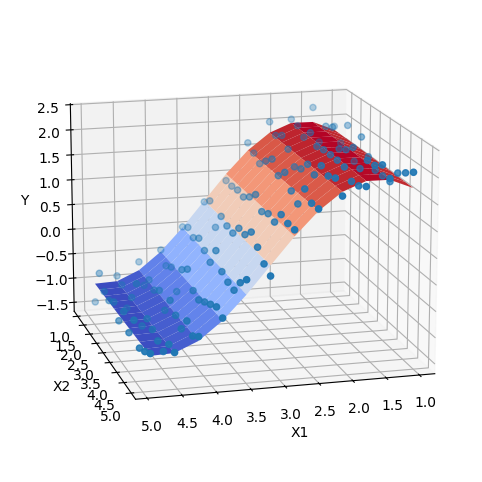

In [63]:
z0 = [1.0, 1.0, 0.75, .5]

x1 = np.array([i*np.pi/180 for i in range(60,300,20)])
x2 = np.linspace(1,5,len(x1))
x1_grid,x2_grid = np.meshgrid(x1,x2)
m  = len(x1)*len(x2)
X  = np.zeros((m,2))
X[:,0]  = x1_grid.flatten()
X[:,1]  = x2_grid.flatten()

y = np.zeros(m)
for i,x1x2 in enumerate(X):
    y[i] = true_function(x1x2)
y += np.random.normal(0, 0.15, m)

c, fk, k, res = levenberg_marquart(f, r, jacobian, X, y, z0)
y_pred = f(X, c)
rmse = np.sqrt(np.linalg.norm(y - y_pred)/len(y))

print(f"ck: {c}")
print(f"fk: {fk}")
print(f"Iteraciones: {k}")
print(f"Convergio: {res}")
print(f"RMSE: {rmse:.4f}\n")
    
Y_grid = y_pred.reshape(x1_grid.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(15, 75)

ck: [ 0.59568646 -1.44223824  1.02924149 -0.91456896]
fk: 57.57655422196425
Iteraciones: 15
Convergio: 1
RMSE: 0.2730



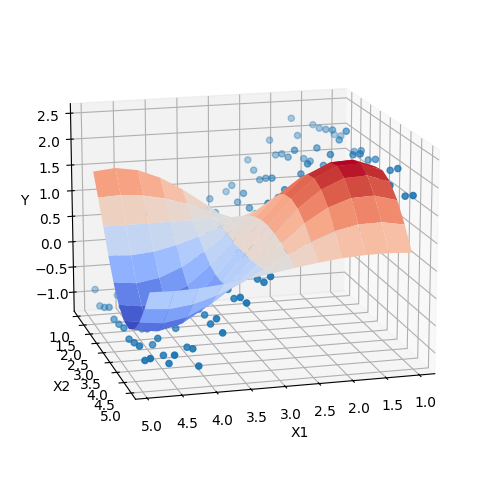

In [74]:
z0 = [1.0, 0.5, 0.75, .5]

x1 = np.array([i*np.pi/180 for i in range(60,300,20)])
x2 = np.linspace(1,5,len(x1))
x1_grid,x2_grid = np.meshgrid(x1,x2)
m  = len(x1)*len(x2)
X  = np.zeros((m,2))
X[:,0]  = x1_grid.flatten()
X[:,1]  = x2_grid.flatten()

y = np.zeros(m)
for i,x1x2 in enumerate(X):
    y[i] = true_function(x1x2)
y += np.random.normal(0, 0.15, m)

c, fk, k, res = levenberg_marquart(f, r, jacobian, X, y, z0)
y_pred = f(X, c)
rmse = np.sqrt(np.linalg.norm(y - y_pred)/len(y))

print(f"ck: {c}")
print(f"fk: {fk}")
print(f"Iteraciones: {k}")
print(f"Convergio: {res}")
print(f"RMSE: {rmse:.4f}\n")
    
Y_grid = y_pred.reshape(x1_grid.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(15, 75)

Los resultados para el primer caso muestran un RMSE menor a los resultados del ejercicio 1; por su parte, aunque el RMSE del segundo caso tambien es menor al de los resultados del ejercicio 1, la forma de la superficie es diferente a los datos dados, posiblemente debido a la presencia de multiples minimos en la sumatoria de los residuales.

```



```

---

## Ejercicio 3. Aproximación de derivadas (2 puntos)

Repita el Ejercicio 2 aproximando las derivadas parciales
que se utilizan para calcular la matriz Jacobiana del vector
de residuales por medio del esquema forward finite differences
de orden 1.

1. Programe la función que calcula la matriz Jacobiana del
   vector residuales. Se requiere usar el incremento $h$
   del esquema de diferencias finitas para aproximar las
   derivadas parciales:
   
$$ \frac{\partial f}{\partial c_i}(\mathbf{c}) \approx
\frac{f(\mathbf{c} + h\mathbf{e}_i) - f(\mathbf{c}) }{h}.
$$

2. Repita las pruebas del Ejercicio 2 con $h=0.00001$ y
   $h=0.001$ para ver como influye la elección del parámetro $h$
   en el resultado.
   
### Solución:


In [59]:
def jacobian_ffd(x, y, c, h=1e-5):
    n_params = len(c)
    m = len(y)
    J = np.zeros((m, n_params))
    R = r(x, c, y)

    for i in range(n_params):
        c_pert = np.copy(c)
        c_pert[i] += h
        f1 = r(x, c_pert, y)
        J[:, i] = (f1 - R) / h

    return J

def levenberg_marquart_ffd(f, r, J, x, y, z0, h=1e-5, mu_ref=0.001, N=200, tau=(np.finfo(float).eps)**(1/3)):
    zk = z0.copy()
    m = len(y)
    tau = np.sqrt(m)*tau
    res = 0
    I = np.eye(len(z0))
    Rk = r(x, zk, y)
    Jk = J(x, y, zk)
    f0 = 0.5*np.linalg.norm(Rk)**2
    A = Jk.T @ Jk
    g = Jk.T @ Rk
    #mu = min(mu_ref, np.max(np.diag(A)))
    mu = mu_ref*np.max(np.diag(A))
    
    for k in range(N):
        pk = np.linalg.solve(A + mu*I, -g)
        if np.linalg.norm(pk) < tau:
            res = 1
            break
        zk = zk + pk
        Rk = r(x, zk, y)
        fk = 0.5*np.linalg.norm(Rk)**2
        rho = (f0-fk)/(0.5 * pk.T @ (mu * pk - g))
        if rho<0.25:
            mu = 2*mu
        elif rho>0.75:
            mu = mu/3

        Jk = J(x, y, zk)
        A = Jk.T @ Jk
        g = Jk.T @ Rk
        f0 = fk
    
    return zk, fk, k, res

ck: [ 0.53090147  1.48973365  1.01780637 -0.01632379]
fk: 1.519487102224129
Iteraciones: 7
Convergio: 1
RMSE: 0.1100



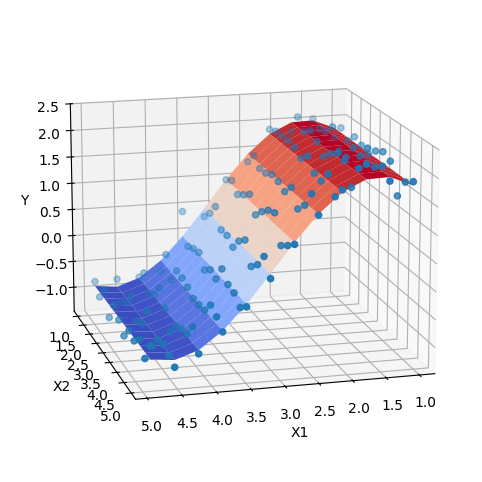

In [60]:
z0 = [1.0, 1.0, 0.75, .5]

x1 = np.array([i*np.pi/180 for i in range(60,300,20)])
x2 = np.linspace(1,5,len(x1))
x1_grid,x2_grid = np.meshgrid(x1,x2)
m  = len(x1)*len(x2)
X  = np.zeros((m,2))
X[:,0]  = x1_grid.flatten()
X[:,1]  = x2_grid.flatten()

y = np.zeros(m)
for i,x1x2 in enumerate(X):
    y[i] = true_function(x1x2)
y += np.random.normal(0, 0.15, m)

c, fk, k, res = levenberg_marquart_ffd(f, r, jacobian_ffd, X, y, z0)
y_pred = f(X, c)
rmse = np.sqrt(np.linalg.norm(y - y_pred)/len(y))

print(f"ck: {c}")
print(f"fk: {fk}")
print(f"Iteraciones: {k}")
print(f"Convergio: {res}")
print(f"RMSE: {rmse:.4f}\n")
    
Y_grid = y_pred.reshape(x1_grid.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(15, 75)

ck: [ 0.49153535  1.51921424  0.99211316 -0.0375751 ]
fk: 1.5141782791819547
Iteraciones: 6
Convergio: 1
RMSE: 0.1099



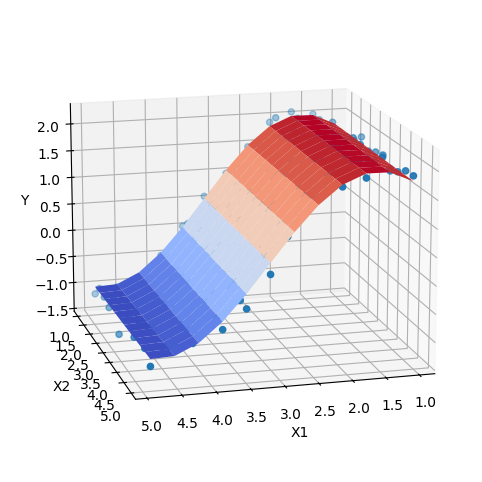

In [61]:
z0 = [1.0, 1.0, 0.75, .5]

x1 = np.array([i*np.pi/180 for i in range(60,300,20)])
x2 = np.linspace(1,5,len(x1))
x1_grid,x2_grid = np.meshgrid(x1,x2)
m  = len(x1)*len(x2)
X  = np.zeros((m,2))
X[:,0]  = x1_grid.flatten()
X[:,1]  = x2_grid.flatten()

y = np.zeros(m)
for i,x1x2 in enumerate(X):
    y[i] = true_function(x1x2)
y += np.random.normal(0, 0.15, m)

c, fk, k, res = levenberg_marquart_ffd(f, r, jacobian_ffd, X, y, z0, h=0.001)
y_pred = f(X, c)
rmse = np.sqrt(np.linalg.norm(y - y_pred)/len(y))

print(f"ck: {c}")
print(f"fk: {fk}")
print(f"Iteraciones: {k}")
print(f"Convergio: {res}")
print(f"RMSE: {rmse:.4f}\n")
    
Y_grid = y_pred.reshape(x1_grid.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(15, 75)

```



```
----

## Ejercicio 4. Algoritmo BFGS (3 puntos)

Programe el algoritmo BFGS modificado y realice las pruebas
para ver su desempeño.

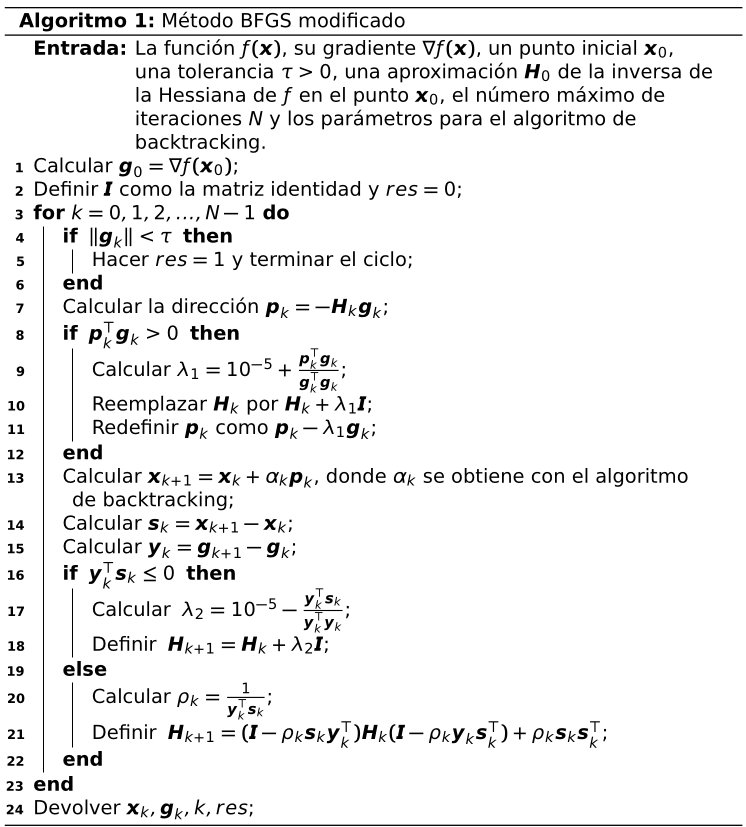

Las modificaciones que se hacen al algoritmo BFGS sirven cuando
la matriz $\mathbf{H}_k$ no es definida positiva, por lo que no
se puede garantizar que $\mathbf{p}_k$ sea una dirección de descenso.
En ese caso se puede perturbar la matriz para reemplazarla  por
$\mathbf{H}_{k} + \lambda_1\mathbf{I}$, pero la perturbación
sólo garantiza que la dirección  $\mathbf{p}_k$  resultante cumpla
con que $\mathbf{p}_{k}^\top\mathbf{g}_{k}<0$, que es indespensable
para el algoritmo de backtracking, pero no garantiza que la matriz
sea definida positiva. Por eso es que solo se aplica la fórmula
para actualizar la matriz $\mathbf{H}_{k}$ sólo si
$\mathbf{y}_{k}^\top\mathbf{s}_{k} > 0$,
y en caso contrario, se prefiere volver a perturbar la matriz.

1. Programe la función que implementa el algoritmo BFGS modificado.
   Si la dimensión de las variables es 2, almacene
   los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$ que genera el algoritmo
   y haga que la función devuelva esta lista para usarlos para graficar la trayectoria.
2. Pruebe el algoritmo con las funciones siguientes
   usando

- los puntos iniciales $\mathbf{x_0}$ indicados,
- definir $\mathbf{H}_{0}$ como la matriz identidad,
- el número de iteraciones máximas $N=10000$ y la tolerancia
- $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
- Para el algoritmo del backtraking use $\alpha_{ini}=1$, $c_1=0.1$, $\rho=0.6$ y el máximo de iteraciones $N_b=100$.

  Una vez que se haya ejecutado el algoritmo imprima los valores siguientes:
  
- $f(\mathbf{x}_0)$,
- el número de iteraciones $k$,
- la norma $\|\mathbf{g}_k\|$.
- Sea $n$ la dimensión de la variable $\mathbf{x}$. Si $n<=6$, imprimir
  el vector $\mathbf{x}_k$. En caso contrario, imprimir las primeras y
  las últimas 3 componentes de  $\mathbf{x}_k$.
- $f(\mathbf{x}_k)$.

   Además, si $n=2$, grafique los contornos de nivel de la función
   y la trayectoria  definida por los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$.
   
3. Escriba un comentario sobre el desempeño del algoritmo BFGS comparado
   con el método de Newton implementado en el Ejercicio 3 de la Tarea 6.

### Funciones de prueba


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   
---

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$

---

**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):**
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 +
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$

$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix},$$

$$
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$

Esta función tiene 6 óptimos locales. El óptimo global es
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

---

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{200}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{600}$


### Solución:

In [83]:
def backtracking_alpha(f, grad, X, p, alpha=1, c1=0.1, rho=0.6, Nb=100):
    g = grad(X)
    for i in range(Nb):
        if f(X + alpha * p) <= f(X) + c1 * alpha * g.T @ p:
            break
        alpha *= rho
    return alpha

def BFGS(f, g, x0, Hk, N=10000, tau=1e-5):
    hist = []
    tau = np.sqrt(len(x0)*tau)
    gk = g(x0)
    I = np.eye(len(x0))
    res = 0
    for k in range(N):
        if len(x0)==2:
            hist.append(x0)
        if np.linalg.norm(gk)<tau:
            res = 1
            break
        pk = -Hk @ gk
        if pk.T @ gk>0:
            lambda1 = 1e-5 + pk.T @ gk/np.linalg.norm(gk)**2
            Hk = Hk + lambda1*I
            pk = pk - lambda1*gk
        alpha = backtracking_alpha(f, g, x0, pk)
        xk = x0 + alpha*pk
        sk = xk - x0
        yk = g(xk) - gk
        gk = g(xk)
        if yk.T@sk<=0:
            lambda2 = 1e-5 - yk.T@sk/np.linalg.norm(yk)**2
            Hk = Hk + lambda2*I
        else:
            rhok = 1/(yk.T@sk)
            Hk = (I - rhok*sk[:,np.newaxis]@yk[np.newaxis,:])@Hk@(I - rhok*yk[:,np.newaxis]@sk[np.newaxis,:]) + rhok*sk[:,np.newaxis]@sk[np.newaxis,:]
        x0 = xk
    norm_g = np.linalg.norm(gk)
    return xk, k, norm_g, res, hist

In [100]:
import numpy as np

def beale(x):
    return (1.5 - x[0] + x[0] * x[1]) ** 2 + (2.25 - x[0] + x[0] * x[1] ** 2) ** 2 + (2.625 - x[0] + x[0] * x[1] ** 3) ** 2

def beale_grad(x):
    grad = np.zeros(2)
    grad[0] = ((x[1] - 1) * ((8 * x[1]**5 + 8 * x[1]**4 + 16 * x[1]**3 - 8 * x[1] - 24) * x[0] + 21 * x[1]**2 + 39 * x[1] + 51)) / 4
    grad[1] = (x[0] * (24 * x[0] * x[1]**5 + 16 * x[0] * x[1]**3 + (63 - 24 * x[0]) * x[1]**2 + (36 - 8 * x[0]) * x[1] - 8 * x[0] + 12)) / 4

    return grad
    
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def himmelblau_grad(x):
    grad = np.zeros(2)
    grad[0] = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    grad[1] = 4 * x[1] * (x[1]**2 + x[0] - 7) + 2 * (x[1] + x[0]**2 - 11)
    return grad

alpha = np.array([1.0, 1.2, 3.0, 3.2])

A = np.array([
    [10.0,   3.0, 17.0, 3.5, 1.7,  8.0],
    [0.05, 10.0, 17.0, 0.1, 8.0, 14.0],
    [3.0,   3.5, 1.7, 10.0, 17.0, 8.0],
    [17.0,  8.0, 0.05,10.0, 0.1, 14.0]
])

P = 1e-4 * np.array([
    [1312, 1696, 5569,  124, 8283, 5886],
    [2329, 4135, 8307, 3736, 1004, 9991],
    [2348, 1451, 3522, 2883, 3047, 6650],
    [4047, 8828, 8732, 5743, 1091,  381]
])

def hartmann6(x):
    total = 0.0
    for i in range(4):
        diff = x - P[i]
        exp_arg = -np.sum(A[i] * diff**2)
        total += alpha[i] * np.exp(exp_arg)
    return -(2.58 + total) / 1.94

def hartmann6_grad(x):
    grad = np.zeros(6)
    for i in range(4):
        diff = x - P[i]
        Ai = A[i]
        exp_arg = -np.sum(Ai * diff**2)
        exp_val = np.exp(exp_arg)
        grad_i = -2 * alpha[i] * exp_val * Ai * diff
        grad += grad_i
    return -grad / 1.94

import numpy as np

def rosenbrock(x):
    return sum(100.0*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

def rosenbrock_grad(x):
    grad = np.zeros(len(x))
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    for i in range(1, len(x) - 1):
        grad[i] = 200 * (x[i] - x[i-1]**2) - 400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
    grad[-1] = 200 * (x[-1] - x[-2]**2)
    return grad

import matplotlib.pyplot as plt
def plot_trajectory(f, trajectory, levels=100, neigh=1):
    trajectory = np.array(trajectory)
    x_vals = trajectory[:, 0]
    y_vals = trajectory[:, 1]

    # Crear malla para contorno
    x = np.linspace(min(x_vals) - neigh, max(x_vals) + neigh, 400)
    #x = np.linspace(-4.5, 4.5, 400)
    y = np.linspace(min(y_vals) - neigh, max(y_vals) + neigh, 400)
    #y = np.linspace(-4.5, 4.5, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f(np.array([xi, yi])) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    # Dibujar contornos
    plt.contour(X, Y, Z, levels=levels)
    # Dibujar trayectoria
    plt.plot(x_vals, y_vals, color='red', label='Trayectoria de BFGS')
    plt.scatter(x_vals[0], y_vals[0], color='red', label='Punto inicial')
    plt.scatter(x_vals[-1], y_vals[-1], marker='s', color='red', label='Punto final')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Método de BFGS - Contornos y Trayectoria')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

## Beale

Resultado: [3.00035395 0.50010077]
f(x): 2.3953665817752672e-08
Iteraciones: 19
Norma del gradiente: 0.000601682390341824
Convergio: 1


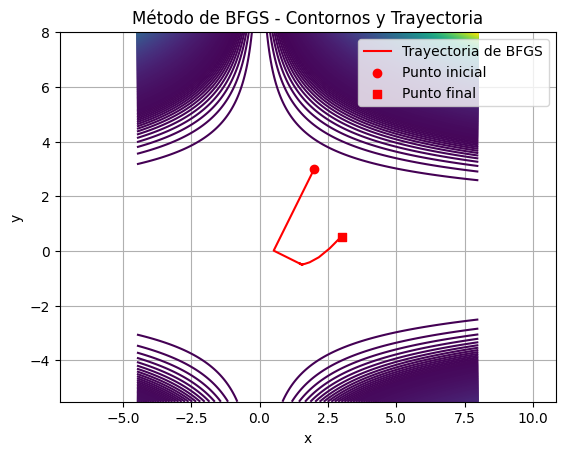

In [101]:
x0 = np.array([2,3])
x, k, norm_g, res, history = BFGS(beale, beale_grad, x0, np.eye(2))
print(f"Resultado: {x}")
print(f"f(x): {beale(x)}")
print(f"Iteraciones: {k}")
print(f"Norma del gradiente: {norm_g}")
print(f"Convergio: {res}")

plot_trajectory(beale,history, 1000, 5)

## Himmelblau

Resultado: [2.99999873 2.00000058]
f(x): 5.0688411091611134e-11
Iteraciones: 10
Norma del gradiente: 8.26292198877383e-05
Convergio: 1


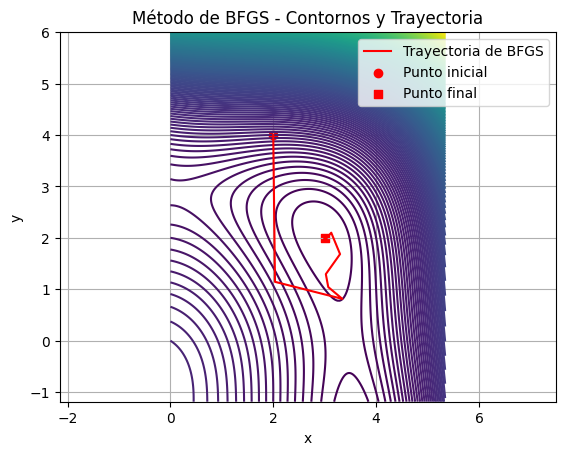

In [102]:
x0 = np.array([2,4])
x, k, norm_g, res, history = BFGS(himmelblau, himmelblau_grad, x0, np.eye(2))

print(f"Resultado: {x}")
print(f"f(x): {himmelblau(x)}")
print(f"Iteraciones: {k}")
print(f"Norma del gradiente: {norm_g}")
print(f"Convergio: {res}")

plot_trajectory(himmelblau,history, 200, 2)

## Hartmann

In [94]:
x0 = np.zeros(6)
x, k, norm_g, res, history = BFGS(hartmann6, hartmann6_grad, x0, np.eye(len(x0)))

print(f"f({x0[0]},{x0[1]}) = {himmelblau(x)}")
print("k = ", k)
print("res = ", res)
print("xk = ", x)
print("||g_k|| = " + str(norm_g))
print(f"f({x[0]:.2f},{x[1]:.2f}) = {himmelblau(x):.2f}")

f(0.0,0.0) = 162.75391583135755
k =  17
res =  1
xk =  [0.20171871 0.14994041 0.47682758 0.27534505 0.31167223 0.65735374]
||g_k|| = 0.0020889803053100843
f(0.20,0.15) = 162.75


## Rosenbrock

Resultado: [0.99966081 0.9993197 ]
f(x): 1.1546547743625363e-07
Iteraciones: 34
Norma del gradiente: 0.00043118078066714424
Convergio: 1


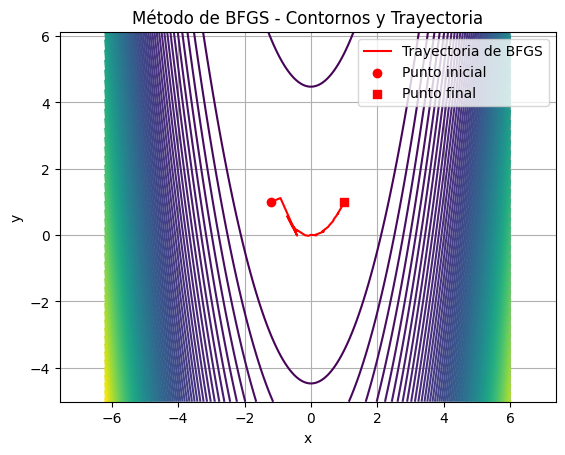

In [104]:
x0 = np.array([-1.2, 1])
x, k, norm_g, res, history = BFGS(rosenbrock, rosenbrock_grad, x0, np.eye(len(x0)))

print(f"Resultado: {x}")
print(f"f(x): {rosenbrock(x)}")
print(f"Iteraciones: {k}")
print(f"Norma del gradiente: {norm_g}")
print(f"Convergio: {res}")

plot_trajectory(rosenbrock,history, 100, 5)

In [98]:
x0 = np.ones(200)
x0[0] = -1.2
x0[-2] = -1.2
x, k, norm_g, res, history = BFGS(rosenbrock, rosenbrock_grad, x0, np.eye(len(x0)))
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(x)}")
print("k = ", k)
print(f"Iteraciones: {k}")
print("xk = ", "[", round(x[0], 2), round(x[1], 2), round(x[2], 2), ", ...,", round(x[-3], 2), round(x[-2], 2), round(x[-1], 2), "]")
print(f"Norma del gradiente: {norm_g}")
print(f"Convergio: {res}")

f(-1.2,1.0) = 3.986624486186901
k =  237
Iteraciones: 237
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
Norma del gradiente: 0.0291317271364693
Convergio: 1


In [99]:
x0 = np.ones(600)
x0[0] = -1.2
x0[-2] = -1.2
x, k, norm_g, res, history = BFGS(rosenbrock, rosenbrock_grad, x0, np.eye(len(x0)))
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(x)}")
print("k = ", k)
print(f"Iteraciones: {k}")
print("xk = ", "[", round(x[0], 2), round(x[1], 2), round(x[2], 2), ", ...,", round(x[-3], 2), round(x[-2], 2), round(x[-1], 2), "]")
print(f"Norma del gradiente: {norm_g}")
print(f"Convergio: {res}")

f(-1.2,1.0) = 3.9866285354974402
k =  435
Iteraciones: 435
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
Norma del gradiente: 0.06708696643273156
Convergio: 1


BFGS tiende a converger mas lentamente y llegar a un resultado menos exacto que el metodo de Newton, requiriendo ademas un mayor costo computacional.